# Random Forest and Boosting Lab

In this lab we will practice using Random Forest Regressor and Boosted Trees Regressor on the Project 6 Data.

> Instructor Notes:
- This walks the students through a sample dataset, they should actually do it on the full dataset they have created as part of Project 6.
- The code for this lab is shorter than usual in order to give the students time to practice with Tableau.

## 1. Load and inspect the data

As part of your work of project 6 you should have retrieved the top 250 movies from IMDB. Conduct this lab on the data you have retrieved.

In the [asset folder](../../assets/datasets/imdb_p6_sample.csv) you can find a subset of the movies, in case you have not completed yet Project 6.

1. Load the dataset and inspect it
- Assign the rating to a y vector and the binary columns to an X feature matrix
- What would you do with the year variable?
> Answer: normalize it and use it as feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../assets/datasets/imdb_p6_sample.csv')

In [3]:
df.head()

,HA,rating,tconst,title,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,1633889,9.3,tt0111161,The Shawshank Redemption,1994,0,1,0,1,0,0,0,1
1,1118799,9.2,tt0068646,The Godfather,1972,1,1,0,0,1,0,1,0
2,762879,9.0,tt0071562,The Godfather: Part II,1974,1,1,0,0,1,0,0,1
3,1616346,9.0,tt0468569,The Dark Knight,2008,1,1,1,0,1,0,1,1
4,835155,8.9,tt0108052,Schindler's List,1993,1,1,1,1,1,1,1,1


In [12]:
a = list(df.columns)[-8:]
print a

['excellent', 'great', 'love', 'beautiful', 'best', 'hope', 'groundbreaking', 'amazing']


In [7]:
cols = ['excellent', 'great', 'love', 'beautiful', 'best', 'hope', 'groundbreaking', 'amazing']

In [8]:
X = df[cols]
X.dtypes

excellent         int64
great             int64
love              int64
beautiful         int64
best              int64
hope              int64
groundbreaking    int64
amazing           int64
dtype: object

In [16]:
y = df['rating']

## 2. Decision Tree Regressor


1. Train a decision tree regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
    - They should align to a diagonal line.
- Add some text to the plot indicating the average $R^2$ coefficient

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import KFold

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
clf = DecisionTreeRegressor()

In [31]:
cv = KFold(len(y), shuffle=True)

In [45]:
def compare_models(est):
    print est
    scores = cross_val_score(est, X, y, cv = cv)
    print
    print("{} Score:\t{:0.3} ± {:0.3}".format(est, scores.mean().round(3), scores.std().round(3)))

In [46]:
for i in mod_list:
    print str(i)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best') Score:	-1.52 ± 0.768

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False) Score:	-0.158 ± 0.45

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) Score:	-0.378 ± 0.403

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf

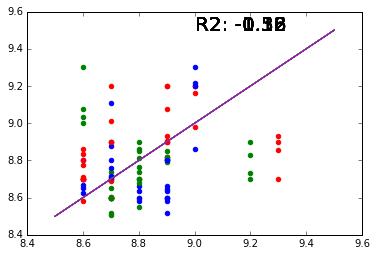

In [43]:
mod_list = [DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]

for i in mod_list:
    compare_models(i)

In [41]:
scores = cross_val_score(clf, X, y, cv = cv)
print("{} Score:\t{:0.3} ± {:0.3}".format(str(clf), s.mean().round(3), s.std().round(3)))

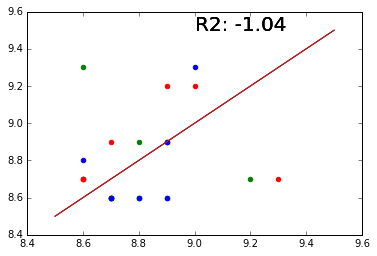

In [34]:
def do_plot(model, m=None):
    for fold, color in zip(cv, ['r', 'g', 'b']):
        X_train = X.iloc[fold[0]]
        X_test  = X.iloc[fold[1]]
        y_train = y.iloc[fold[0]]
        y_test  = y.iloc[fold[1]]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        plt.scatter(y_test, y_pred, color=color)
        plt.plot([8.5,9.5],[8.5,9.5])
        plt.text(9,9.5, "R2: "+str(m), fontsize=20, )
        
do_plot(clf, scores.mean().round(2))

## 3. Random Forest Regressor


1. Train a random forest regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- How does this plot compare with the previous one?
> Answer: points are tighter now, indicating a better fit

In [35]:
from sklearn.ensemble import RandomForestRegressor

clf_r = RandomForestRegressor()

scores = cross_val_score(clf_r, X, y, cv = cv)

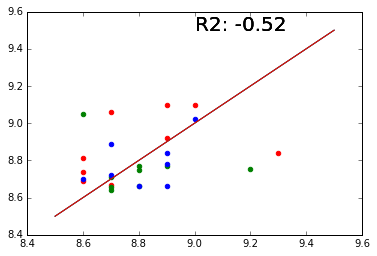

In [36]:
do_plot(clf_r, scores.mean().round(2))

## 4. AdaBoost Regressor


1. Train a AdaBoost regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

In [37]:
from sklearn.ensemble import AdaBoostRegressor

clf_a = AdaBoostRegressor()

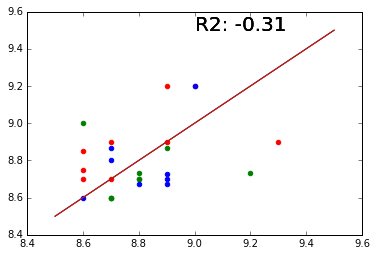

In [38]:
scores = cross_val_score(clf_a, X, y, cv = cv)
do_plot(clf_a, scores.mean().round(2))

## 4. Gradient Boosting Trees Regressor


1. Train a Gradient Boosting Trees regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

clf_g = GradientBoostingRegressor()

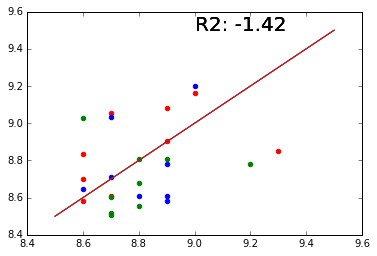

In [40]:
scores = cross_val_score(clf_g, X, y, cv = cv)
do_plot(clf_g, scores.mean().round(2))

## 5. Tableau Practice

Practice using Tableau to inspect the data and also to plot the results.


## Bonus

Take the best model and try to improve it using grid search.